# Segunda atividade
## Atividade de Word Embeeding

Modelo de *word embedding* para disciplina de pós-graduação "Tópicos Especiais em Gestão e Tecnologia II: Representações Distribuídas de Texto e Modelagem de Tópicos.

"Um modelo de *word embedding* com o corpus escolhido na primeira etapa, segundo este notebook 
https://github.com/rsouza/FGV_Intro_DS/blob/master/notebooks/ML_UNSUP_Word2Vec_Example.ipynb".

" O prazo de finalização é 08/12"

**Professor: Renato Rocha Souza.**

# Resolução

Utilizei o repositório da atividade anterior: 15 artigos científicos contendo a palavra "Ontology" no título. Os artigos e teses foram selecionados ao acaso. O Repositório dessas atividades foi atualizado em 07/12/2019 e está disponível em: .

Os modelos de *words embeddings* utilizados foram os dois algoritmos principais de treinamento para o word2vec:
1. Continuous Bag-Of-Word (CBOW); e
2. skip-gram. 

A principal diferença entre esses algoritmos é que o CBOW usa o contexto para ***prever a palavra*** e o skip-gram usa a palavra para ***prever o contexto***. 

In [1]:
import os
import pathlib
import time
import codecs
import string
import re
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import urllib
import requests
from bs4 import BeautifulSoup

import nltk
import networkx as nx
import gensim
from wordcloud import WordCloud
import textract

from IPython.core.display import Image
%matplotlib inline

In [2]:
import re
limpar = re.compile(r'\s+')
limpar1 = re.compile(r'•+')
stop_pt = nltk.corpus.stopwords.words('portuguese')
stop_en = nltk.corpus.stopwords.words('english')
stopwords = stop_en + stop_pt
stopwords.extend([  u'\n','-','','–','et','al', 'obo','a', 'e', 'i', 'o', 'u', r'de','28',\
                   'b', 'c', 'd', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'p', 'q', \
                   'r', 's', 't', 'v', 'w', 'x', 'y', 'z','2007', '2009', '2010', '2004', '2005', '2006', \
                   '•','0','1','2','3','4','5','6','7','8','9','•','viii', \
                   'http',':','//','www', u'\uf0df', u'\uf052', u'\uf0ea',u'\uf0fa',\
                    u'\uf03d','0\uf0fa', '©asunción','', '','©', ',,','gt','31','brasil','','',\
                   'also', 'may', 'one', '2001', 'corcho', 'gómez-pérez', 'fernández-lópez', \
                   'travel','fernández', '10', 'ois', 'http://www'])

In [3]:
ontologia = ['ontologies']
def limpa(text):
    list_words = text.split()
    list_words = [l.strip(string.punctuation) for l in list_words]
    list_words = [l.strip().lower() for l in list_words]
    list_words = [l.strip(string.punctuation) for l in list_words]
    list_words = [l for l in list_words if l not in stopwords]    
    input_text = ''
    for l in list_words:
        if l.lower() in ontologia:
            l = 'ontology'
        input_text += ' '+l        
    return str(input_text+' | ')

In [4]:
def build_neighbors(word, model, nviz=10):
    g = nx.Graph()
    g.add_node(word)
    viz1 = model.wv.most_similar(word, topn=nviz)
    g.add_weighted_edges_from([(word, v, w) for v,w in viz1 if w> 0.5] )
    for v in viz1:
        g.add_weighted_edges_from([(v[0], v2, w2) for v2,w2 in model.wv.most_similar(v[0])])
    return g

In [5]:
def print_results(model, palavra):
    print(palavra)
    for result in model.wv.most_similar(palavra):
        print(result)
    print()

## Lendo o repositório

In [6]:
onlydirs = [f for f in os.listdir('.') if os.path.isdir(os.path.join('.',f)) and not f.startswith('.')]
corpuspath = 'pdf'

onlyfiles = [f for f in os.listdir(corpuspath) if os.path.isfile(os.path.join(corpuspath,f)) and not f.startswith('.')]
onlydirs.sort()

lista = []
input_text = ''

for filename in [f for f in onlyfiles if f.endswith('pdf')]:
    text = textract.process(os.path.join(corpuspath,filename)).decode('utf-8')
    list_words = text.split('.')
    list_words = [limpar.sub(' ',l) for l in list_words]
    
    for l in list_words:  
        input_text += limpa(l) 
      


## Criando uma lista de sentenças

In [7]:
# Lista de sentenças
sentences_strings_ted = []
for line in input_text.split('|'):
    sentences_strings_ted.extend([line])
    
# tokenização
sentences_ted = []
for sent_str in sentences_strings_ted:
    tokens = sent_str.lower().split()
    sentences_ted.append(tokens)

In [8]:
from gensim.models import Word2Vec
#CBOW
model_0 = Word2Vec(sentences=sentences_ted, size=100, window=5, min_count=40, workers=4, sg=0)

#Skip-gram
model_1 = Word2Vec(sentences=sentences_ted, size=100, window=5, min_count=40, workers=4, sg=1)

## imprimindo: CBOW 

In [9]:
print_results(model_0,'ontology')

ontology
('domain', 0.9994571805000305)
('language', 0.9994069933891296)
('tools', 0.9993675947189331)
('ontological', 0.9993655681610107)
('building', 0.9993648529052734)
('model', 0.9993630051612854)
('creating', 0.9993375539779663)
('use', 0.9993280172348022)
('provide', 0.9993277192115784)
('therefore', 0.9993264079093933)



## imprimindo: skip-gram 

In [10]:
model_1.wv.most_similar('ontology')

[('level', 0.9804015159606934),
 ('conceptual', 0.9744852781295776),
 ('modelling', 0.970782458782196),
 ('model', 0.9664660692214966),
 ('specific', 0.9645201563835144),
 ('different', 0.9632563591003418),
 ('building', 0.9613884091377258),
 ('modeling', 0.9599728584289551),
 ('use', 0.9597368240356445),
 ('work', 0.959635317325592)]

# Redes de palavras para o termo "*ontology*" (CBOW)

/home/heber/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


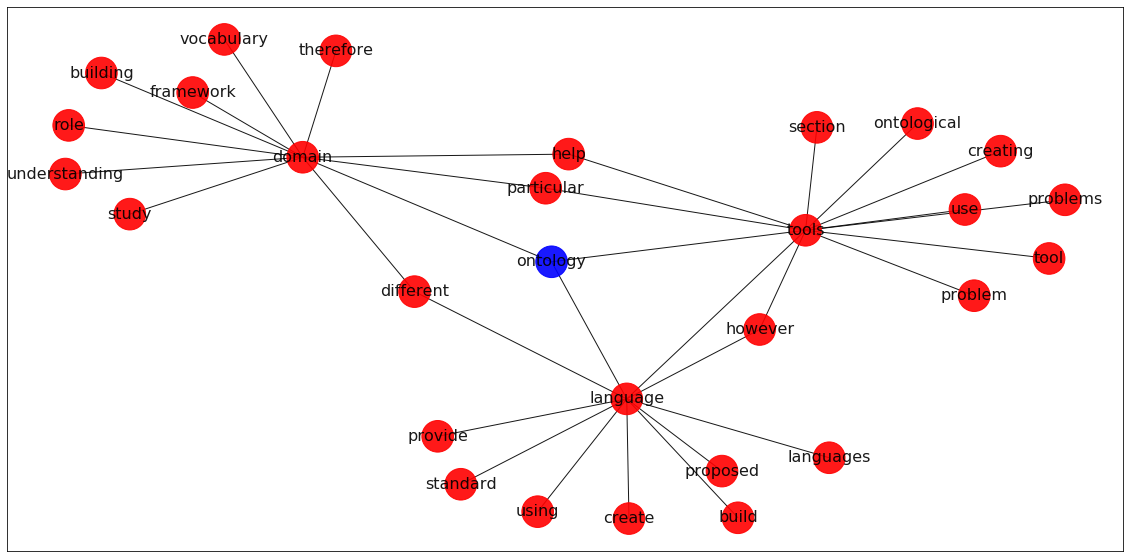

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
word = 'ontology'

g = build_neighbors(word, model_0,3);
cols = ['r']*len(g.nodes()); 
cols[0]='blue'
pos = nx.spring_layout(g, iterations=300)
nx.draw_networkx(g, pos=pos, node_color=cols, node_size=1000, alpha=0.9, font_size= 16)

# Redes de palavras para o termo "*ontology*"  (skip-gram)

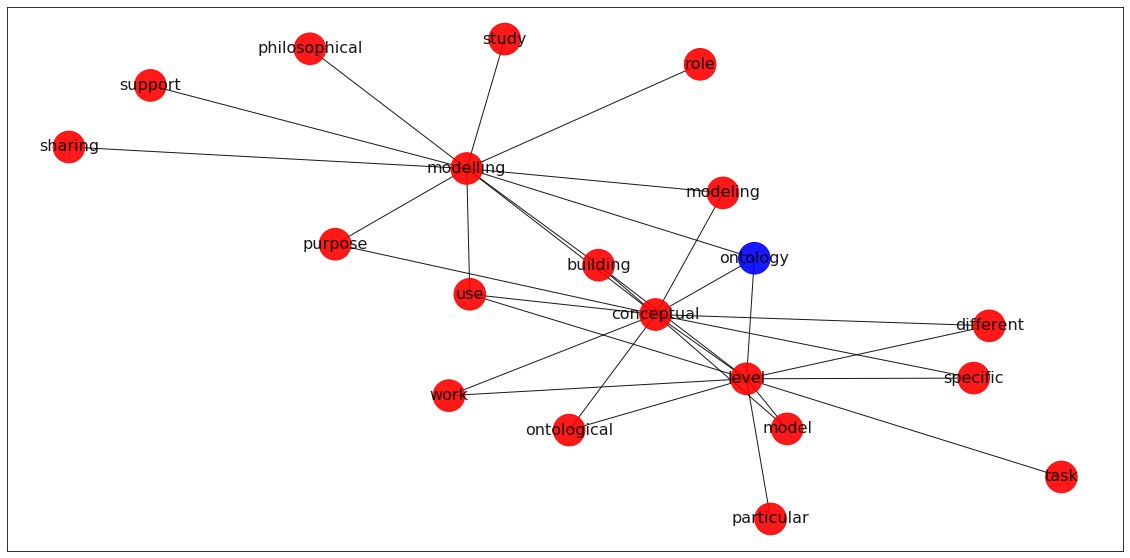

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
word = 'ontology'

g = build_neighbors(word, model_1,3);
cols = ['r']*len(g.nodes()); 
cols[0]='blue'
pos = nx.spring_layout(g, iterations=300)
nx.draw_networkx(g, pos=pos, node_color=cols, node_size=1000, alpha=0.9, font_size= 16)

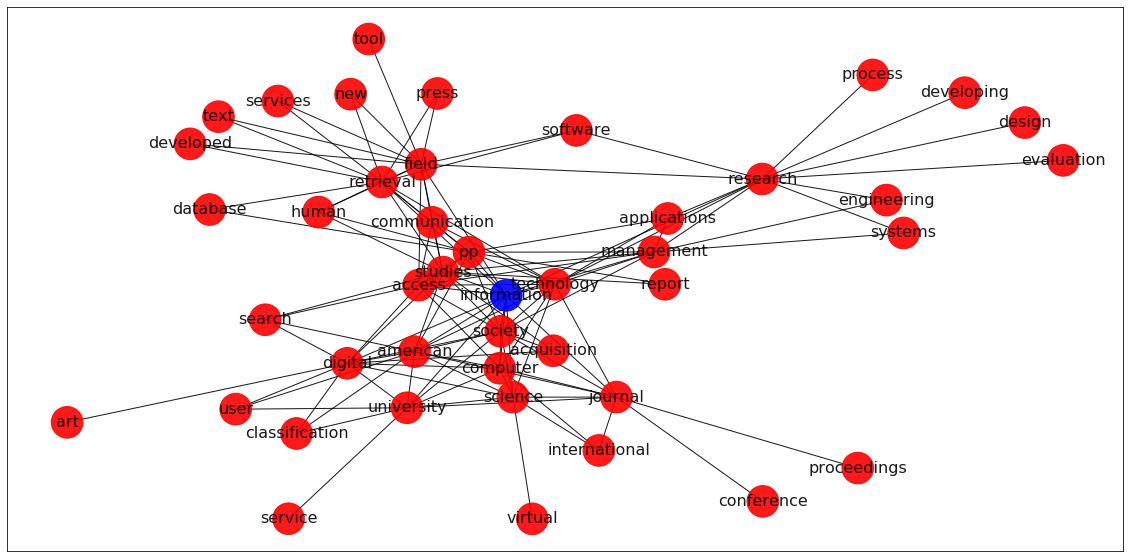

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
word = 'information'

g = build_neighbors(word, model_1,15);
cols = ['r']*len(g.nodes()); 
cols[0]='blue'
pos = nx.spring_layout(g, iterations=300)
nx.draw_networkx(g, pos=pos, node_color=cols, node_size=1000, alpha=0.9, font_size= 16)

In [13]:
print(sentences_ted[:200])

[['double', 'role', 'ontology', 'information', 'science', 'research', 'frederico', 'fonseca', 'college', 'information', 'sciences', 'technology', 'pennsylvania', 'state', 'university', 'university', 'park', 'pa', '16802–6823'], ['e-mail', 'fredfonseca@ist'], ['psu'], ['edu', 'philosophy', 'ontology', 'basic', 'description', 'things', 'world'], ['information', 'science', 'ontology', 'refers', 'engineering', 'artifact', 'constituted', 'specific', 'vocabulary', 'used', 'describe', 'certain', 'reality'], ['ontology', 'proposed', 'validating', 'conceptual', 'models', 'conceptual', 'schemas', 'however', 'roles', 'quite', 'dissimilar'], ['article', 'show', 'ontology', 'better', 'understood', 'classify', 'different', 'uses', 'term', 'appears', 'literature'], ['first', 'explain', 'ontology', 'upper', 'case', 'used', 'philosophy'], ['propose', 'differentiation', 'ontology', 'information', 'systems', 'ontology', 'information', 'systems'], ['three', 'concepts', 'important', 'role', 'information', 

In [14]:
print(input_text[400:800])

ed validating conceptual models conceptual schemas however roles quite dissimilar |  article show ontology better understood classify different uses term appears literature |  first explain ontology upper case used philosophy |  propose differentiation ontology information systems ontology information systems |  three concepts important role information science |  clarify different meanings uses o


In [15]:
print('Nº de termos: '+str(len(model_0.wv.vocab))+'\n')
for word in model_0.wv.vocab:
    print(word)

Nº de termos: 337

role
ontology
information
science
research
technology
state
university
edu
philosophy
basic
description
things
world
engineering
specific
vocabulary
used
describe
proposed
conceptual
models
however
better
different
uses
term
first
case
systems
three
concepts
important
guarino
provides
understanding
1996
computer
definition
set
explicit
intended
meaning
1998
work
journal
studies
use
well
foundation
online
two
creation
methods
create
among
created
support
tools
form
system
components
figure
communities
study
1995
2002
1997
1999
applied
model
level
implementation
time
type
general
purpose
according
describes
related
domain
like
task
particular
american
society
discussion
section
philosophical
modeling
development
shows
help
us
build
process
creating
clear
make
field
ontological
design
point
means
way
must
question
knowledge
problem
fundamental
smith
2003
natural
fact
since
subject
main
approaches
approach
provide
representation
would
theory
using
common
practice
domains